In [1]:
import sys
from dotenv import load_dotenv

sys.path.insert(0, './../')
load_dotenv()

True

In [2]:
import os
import utilities as utils
import numpy as np
import matplotlib.pyplot as plt
from random import randint

c:\Users\Bugi\miniconda3\envs\modeling\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
c:\Users\Bugi\miniconda3\envs\modeling\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.12.0 and strictly below 2.15.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.1 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.

In [3]:
# main path
path_full = os.environ.get("ORI_PATH")
# path where the datasets are stored
path_dataset_ori = os.path.join(path_full, "datasets", "splitted", "original")
path_dataset_aug = os.path.join(path_full, "datasets", "splitted", "augmented")
path_test_ori = os.path.join(path_dataset_ori, "test")
path_test_aug = os.path.join(path_dataset_aug, "test")
# path where the model are stored
path_model = os.path.join(path_full, "data", "model")

In [4]:
# get the image and mask files
test_ori_img, test_ori_mask = utils.load_img_mask(path_test_ori)
test_aug_img, test_aug_mask = utils.load_img_mask(path_test_aug)
# create the tf dataset
testset_ori = utils.create_dataset(test_ori_img, test_ori_mask)
testset_aug = utils.create_dataset(test_aug_img, test_aug_mask)

In [6]:
# model unet
pred_unet_mask_ori, unet_model_ori = utils.predict_model(testset_ori, path_model, "unet_model_ori")
print("Unet model ori done")
pred_unet_mask_aug, unet_model_aug = utils.predict_model(testset_aug, path_model, "unet_model_aug")
print("Unet model aug done")
# model mobilenet
pred_mnet_mask_ori, mnet_model_ori = utils.predict_model(testset_ori, path_model, "mnet_model_ori")
print("Mnet model ori done")
pred_mnet_mask_aug, mnet_model_aug = utils.predict_model(testset_aug, path_model, "mnet_model_aug")
print("Mnet model aug done")
# model efficientnet
pred_efnet_mask_ori, efnet_model_ori = utils.predict_model(testset_ori, path_model, "efnet_model_ori")
print("Efnet model ori done")
pred_efnet_mask_aug, efnet_model_aug = utils.predict_model(testset_aug, path_model, "efnet_model_aug")
print("Efnet model aug done")

1/1 [==============================] - 10s 10s/step
Unet model ori done
1/1 [==============================] - 1s 510ms/step
Unet model aug done
1/1 [==============================] - 2s 2s/step
Mnet model ori done
1/1 [==============================] - 1s 518ms/step
Mnet model aug done
1/1 [==============================] - 4s 4s/step
Efnet model ori done
1/1 [==============================] - 6s 6s/step
Efnet model aug done


In [8]:
# set the threshold value
treshold = .5

In [13]:
# show the predicted disc and cup area for the unet model in the original dataset
print("Unet model ori predicted mask")
unet_cup_mask_ori, unet_disc_mask_ori, unet_bcup_mask_ori, unet_bdisc_mask_ori = utils.split_disc_cup_mask(pred_unet_mask_ori,
                                                                                                            treshold,
                                                                                                            visualize=False)
# show the predicted disc and cup area for the unet model in the augmented dataset
print("Unet model aug predicted mask")
unet_cup_mask_aug, unet_disc_mask_aug, unet_bcup_mask_aug, unet_bdisc_mask_aug = utils.split_disc_cup_mask(pred_unet_mask_aug,
                                                                                                            treshold,
                                                                                                            visualize=False)

# show the predicted disc and cup area for the efficientnet model in the original dataset
print("Mnet model ori predicted mask")
mnet_cup_mask_ori, mnet_disc_mask_ori, mnet_bcup_mask_ori, mnet_bdisc_mask_ori = utils.split_disc_cup_mask(pred_mnet_mask_ori,
                                                                                                            treshold,
                                                                                                            visualize=False)
# show the predicted disc and cup area for the efficientnet model in the augmented dataset
print("Mnet model aug predicted mask")
mnet_cup_mask_aug, mnet_disc_mask_aug, mnet_bcup_mask_aug, mnet_bdisc_mask_aug = utils.split_disc_cup_mask(pred_mnet_mask_aug,
                                                                                                            treshold,
                                                                                                            visualize=False)

# show the predicted disc and cup area for the efficientnet model in the original dataset
print("Efnet model ori predicted mask")
efnet_cup_mask_ori, efnet_disc_mask_ori, efnet_bcup_mask_ori, efnet_bdisc_mask_ori = utils.split_disc_cup_mask(pred_efnet_mask_ori,
                                                                                                                treshold,
                                                                                                                visualize=False)
# show the predicted disc and cup area for the efficientnet model in the augmented dataset
print("Efnet model aug predicted mask")
efnet_cup_mask_aug, efnet_disc_mask_aug, efnet_bcup_mask_aug, efnet_bdisc_mask_aug = utils.split_disc_cup_mask(pred_efnet_mask_aug,
                                                                                                                treshold,
                                                                                                                visualize=False)

Unet model ori predicted mask
Unet model aug predicted mask
Mnet model ori predicted mask
Mnet model aug predicted mask
Efnet model ori predicted mask
Efnet model aug predicted mask


In [14]:
# get the random index
idx = randint(0, len(testset_ori)-1)

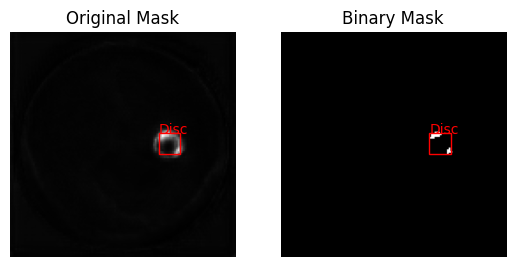

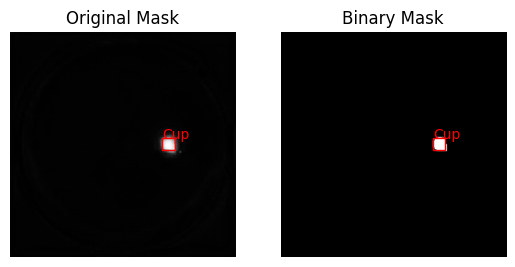

The CDR value for Unet model ori
cup_area: 53
disc_area: 24
acdr: 2.2083333333333335
h_cdr: 0.6153846153846154
v_cdr: 0.6153846153846154
bounding box value {'d_ymin': 57, 'd_ymax': 69, 'd_xmin': 84, 'd_xmax': 96, 'd_height': 13, 'd_width': 13, 'c_ymin': 60, 'c_ymax': 67, 'c_xmin': 86, 'c_xmax': 93, 'c_height': 8, 'c_width': 8}


In [15]:
# calculate the CDR value for the unet model with the original dataset
cdr_result = utils.calculate_area_CDR(unet_cup_mask_ori[idx], unet_disc_mask_ori[idx], unet_bcup_mask_ori[idx], unet_bdisc_mask_ori[idx])
print("The CDR value for Unet model ori")
# show the result
for key, value in cdr_result[0].items():
    print(f"{key}: {value}")
print("bounding box value", cdr_result[1])

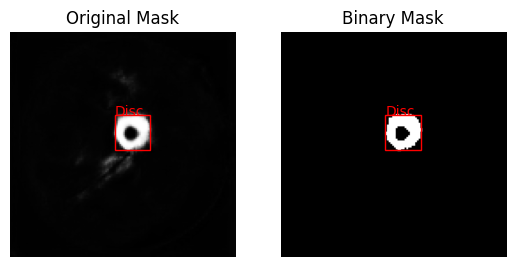

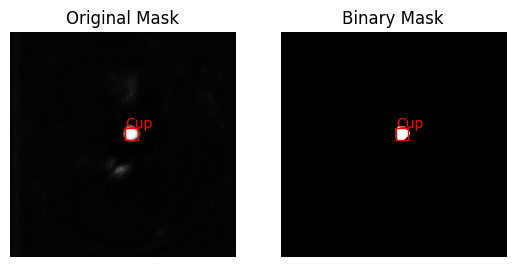

The CDR value for Unet model aug
cup_area: 50
disc_area: 274
acdr: 0.18248175182481752
h_cdr: 0.38095238095238093
v_cdr: 0.38095238095238093
bounding box value {'d_ymin': 47, 'd_ymax': 67, 'd_xmin': 59, 'd_xmax': 79, 'd_height': 21, 'd_width': 21, 'c_ymin': 54, 'c_ymax': 61, 'c_xmin': 65, 'c_xmax': 72, 'c_height': 8, 'c_width': 8}


In [16]:
# calculate the CDR value for the unet model with the augmented dataset
cdr_result = utils.calculate_area_CDR(unet_cup_mask_aug[idx], unet_disc_mask_aug[idx], unet_bcup_mask_aug[idx], unet_bdisc_mask_aug[idx])
print("The CDR value for Unet model aug")
# show the result
for key, value in cdr_result[0].items():
    print(f"{key}: {value}")
print("bounding box value", cdr_result[1])

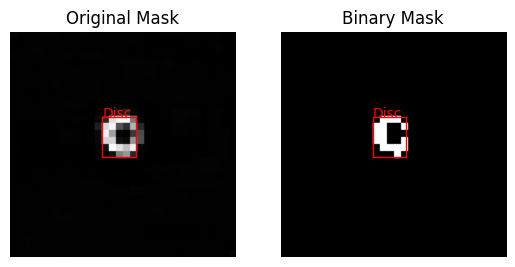

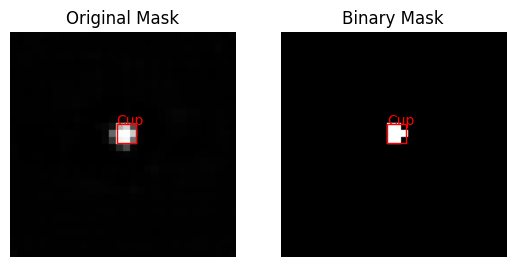

The CDR value for Mnet model ori
cup_area: 112
disc_area: 256
acdr: 0.4375
h_cdr: 0.6
v_cdr: 0.5
bounding box value {'d_ymin': 48, 'd_ymax': 71, 'd_xmin': 52, 'd_xmax': 71, 'd_height': 24, 'd_width': 20, 'c_ymin': 52, 'c_ymax': 63, 'c_xmin': 60, 'c_xmax': 71, 'c_height': 12, 'c_width': 12}


In [17]:
# calculate the CDR value for the mobilenet model with the original dataset
cdr_result = utils.calculate_area_CDR(mnet_cup_mask_ori[idx], mnet_disc_mask_ori[idx], mnet_bcup_mask_ori[idx], mnet_bdisc_mask_ori[idx])
print("The CDR value for Mnet model ori")
# show the result
for key, value in cdr_result[0].items():
    print(f"{key}: {value}")
print("bounding box value", cdr_result[1])

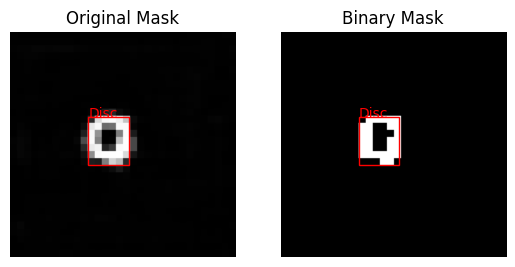

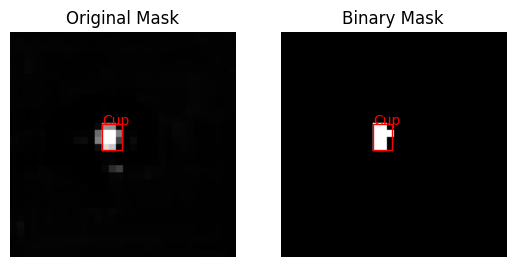

The CDR value for Mnet model aug
cup_area: 144
disc_area: 448
acdr: 0.32142857142857145
h_cdr: 0.5
v_cdr: 0.5714285714285714
bounding box value {'d_ymin': 48, 'd_ymax': 75, 'd_xmin': 44, 'd_xmax': 67, 'd_height': 28, 'd_width': 24, 'c_ymin': 52, 'c_ymax': 67, 'c_xmin': 52, 'c_xmax': 63, 'c_height': 16, 'c_width': 12}


In [18]:
# calculate the CDR value for the mobilenet model with the augmented dataset
cdr_result = utils.calculate_area_CDR(mnet_cup_mask_aug[idx], mnet_disc_mask_aug[idx], mnet_bcup_mask_aug[idx], mnet_bdisc_mask_aug[idx])
print("The CDR value for Mnet model aug")
# show the result
for key, value in cdr_result[0].items():
    print(f"{key}: {value}")
print("bounding box value", cdr_result[1])

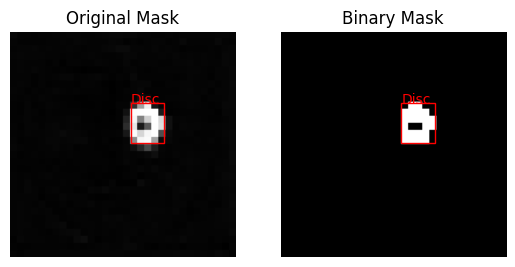

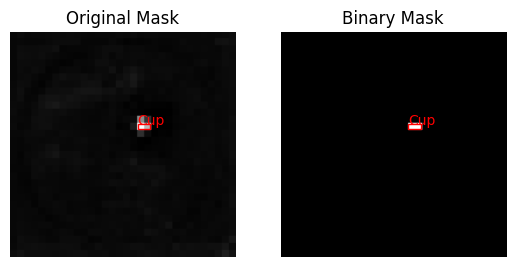

The CDR value for Efnet model ori
cup_area: 32
disc_area: 352
acdr: 0.09090909090909091
h_cdr: 0.4
v_cdr: 0.16666666666666666
bounding box value {'d_ymin': 40, 'd_ymax': 63, 'd_xmin': 68, 'd_xmax': 87, 'd_height': 24, 'd_width': 20, 'c_ymin': 52, 'c_ymax': 55, 'c_xmin': 72, 'c_xmax': 79, 'c_height': 4, 'c_width': 8}


In [19]:
# calculate the CDR value for the efficientnet model with the original dataset
cdr_result = utils.calculate_area_CDR(efnet_cup_mask_ori[idx], efnet_disc_mask_ori[idx], efnet_bcup_mask_ori[idx], efnet_bdisc_mask_ori[idx])
print("The CDR value for Efnet model ori")
# show the result
for key, value in cdr_result[0].items():
    print(f"{key}: {value}")
print("bounding box value", cdr_result[1])

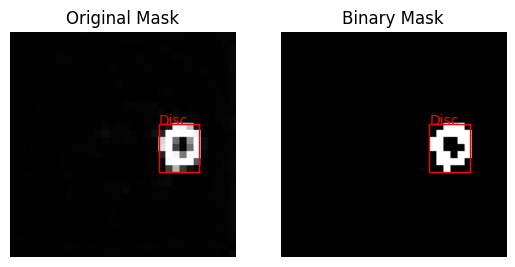

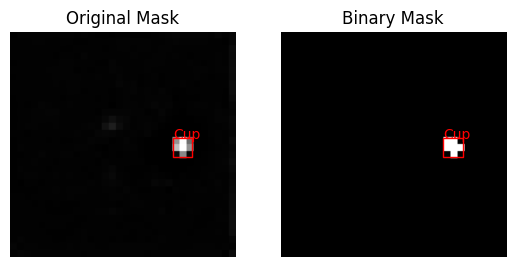

The CDR value for Efnet model aug
cup_area: 96
disc_area: 384
acdr: 0.25
h_cdr: 0.5
v_cdr: 0.42857142857142855
bounding box value {'d_ymin': 52, 'd_ymax': 79, 'd_xmin': 84, 'd_xmax': 107, 'd_height': 28, 'd_width': 24, 'c_ymin': 60, 'c_ymax': 71, 'c_xmin': 92, 'c_xmax': 103, 'c_height': 12, 'c_width': 12}


In [20]:
# calculate the CDR value for the efficientnet model with the augmented dataset
cdr_result = utils.calculate_area_CDR(efnet_cup_mask_aug[idx], efnet_disc_mask_aug[idx], efnet_bcup_mask_aug[idx], efnet_bdisc_mask_aug[idx])
print("The CDR value for Efnet model aug")
# show the result
for key, value in cdr_result[0].items():
    print(f"{key}: {value}")
print("bounding box value", cdr_result[1])